# Sequences and Time series Forecasting

## Sequences
$\bf{Definition}$: A sequence is a collection of data points or events that are ordered in a specific manner. 

## Use cases for sequences
1. stock prices 
2. weather patterns 
3. text data
4. DNA sequences


## Time Series
$\bf{Definition}$:Time series forecasting is a specific type of sequence analysis that focuses on predicting future values based on past observations. In time series forecasting, the data points are collected over regular intervals of time, such as daily, monthly, or yearly, and the goal is to understand and predict the patterns and trends within the data.

## Use cases for time series forecasting
1. sales forecasting
2. demand forecasting 
3. stock market analysis
4. weather prediction
6. resource allocation. 

# L2: Introduction to Sequences

## 

## Types of sequences
1. Fibonacci (next element = sum of last two e.g., [0,1,1,2,3,5,8,...])
2. Geometric (next element = multiply previous element by a constant e.g., [2,6,18,54,...] c = 3 )
3. Arithmetic (add constant to previous element e.g., [2,5,8,11,...] c = 3)

In [1]:
# Example:  Generating an arithmetic sequence
start = 2
constant = 3
num_elements = 5

sequence = []
for i in range(num_elements):
    sequence.append(start + i * constant)
print(sequence)

[2, 5, 8, 11, 14]


## Time Series Sequences

In [2]:
import pandas as pd
import numpy as np


In [3]:
start = pd.to_datetime('2023-01-01 00:00:00')
timestamps = pd.date_range(start, periods=100, freq='15T')
dates = pd.to_datetime(timestamps)

<Axes: >

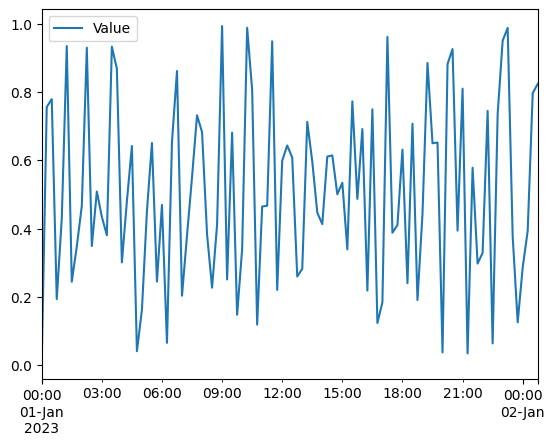

In [4]:
# Create a time series with random values
values = np.random.rand(len(dates))
# Create a DataFrame with the time index and values
time_series = pd.DataFrame({'Value': values}, index=dates)
# Plot our time series
time_series.plot()


# L3: Preprocessing and Data Preparation for Time Series Data

## Preprocessing Techniques
1. Missing Values
2. Dealing with outliers
3. Resampling for forecasting
4. Scaling and Normalization
5. Seasonality and Trend

In [11]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose

## Missing Values

In [10]:
# Check for missing values
print(time_series.isnull().sum())

# Fill missing values with forward fill (last known value)
data_filled = time_series.ffill()

# Fill missing values with backward fill (next known value)
data_filled = time_series.bfill()

# Fill missing values with interpolation
data_filled = time_series.interpolate()


Value    0
dtype: int64


## Dealing with outliers

In [ ]:
# Compute z-scores for each data point
z_scores = np.abs(stats.zscore(time_series))

# Define a threshold for outlier detection
threshold = 3

# Identify outlier indices
outlier_indices = np.where(z_scores > threshold)[0]

# Remove outliers
data_no_outliers = time_series.copy()
data_no_outliers.iloc[outlier_indices] = np.nan


## Resampling for forecasting

In [ ]:
# Resample to a higher frequency (e.g., from daily to hourly)
data_resampled = data.resample('H').mean()

# Resample to a lower frequency (e.g., from daily to monthly)
data_resampled = data.resample('M').sum()


## Scaling and Normalization

In [ ]:
# Min-max scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(time_series)

# Standardization
scaler = StandardScaler()
data_standardized = scaler.fit_transform(time_series)

## Seasonality and Trend

In [ ]:
# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(data)

# Access the individual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid